# Lidando com os valores NaN e Pré-processamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
portfolio3 = pd.read_csv('dados/estaticos_portfolio3.csv')
market = pd.read_csv('dados/market_clean_analise_exploratoria.csv')
portfolio1 = pd.read_csv('dados/estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('dados/estaticos_portfolio2.csv')

In [3]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
market = market.drop(['Unnamed: 0'], axis = 1)

In [4]:
print('Shape do Portfolio1 é', portfolio1.shape)
print('Shape do Portfolio2 é', portfolio2.shape)
print('Shape do Portfolio3 é', portfolio3.shape)
print('Shape do Market é', market.shape)

Shape do Portfolio1 é (555, 181)
Shape do Portfolio2 é (566, 1)
Shape do Portfolio3 é (265, 1)
Shape do Market é (462298, 40)


In [5]:
market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,nm_micro_regiao,fl_passivel_iss,qt_socios,idade_media_socios,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,NATAL,True,2.0,44.0,NaN,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,TERESINA,True,1.0,27.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,MANAUS,True,1.0,32.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,MANAUS,True,1.0,36.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NATAL,True,1.0,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


In [6]:
pd.set_option('display.max_columns', 500)

## Verificando a presença de outliers incoerente 

In [7]:
market.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.000000,460371.000000,460371.000000,417022.000000,318469.000000,347207.000000,310696.000000,145029.000000,4.347850e+05,4.347850e+05,462298.000000
mean,9.948677,3.591801,48.699177,25.007247,1308.005725,1.496326,42.816452,1.107117,8.020911e+05,3.367205e+08,28.737044
std,9.615664,72.600352,1206.696804,9.679799,1161.889222,3.276626,12.626447,0.840194,3.099979e+07,7.114614e+09,468.626094
min,0.016438,0.000000,0.000000,0.000000,100.000000,1.000000,-2.000000,1.000000,0.000000e+00,4.104703e+04,0.000000
25%,2.756164,0.000000,0.000000,22.000000,673.230000,1.000000,33.000000,1.000000,1.648512e+05,1.854576e+05,0.000000
50%,6.704110,0.000000,0.000000,23.000000,946.680000,1.000000,42.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
75%,14.465753,0.000000,0.000000,25.000000,1518.080000,2.000000,51.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
max,106.432877,9782.000000,122090.000000,66.000000,75093.840000,246.000000,127.000000,140.000000,1.454662e+10,2.227618e+11,9647.000000


## Como podemos ver, a idade média dos sócios máxima é 127 anos e mínima -2 anos. Vamos tratar esse outliers.

In [7]:
market_media_ajuste = market.copy()

## Trocando os valores indevidos da idade

Através da base de dados do mercado, viemos a conclusão que seria coerente trocar as notas abaixo de 18 para 18 anos e acima de 70 para 70 anos.
Os valores faltantes, vamos preencher com a média da idade.

In [8]:
market_media_ajuste['idade_media_socios'].fillna(0, inplace=True)

In [9]:
def troca_media_idade(dado):
    if dado==0:
        return 42.816452
    elif dado < 18:
        return 18
    elif dado > 70:
        return 70
    else:
        return dado

In [10]:
market_media_ajuste['idade_media_socios'] = market_media_ajuste['idade_media_socios'].apply(troca_media_idade)

In [11]:
market_media_ajuste.shape

(462298, 40)

## Pré-Processamento

In [12]:
market_clean = market_media_ajuste.copy()

In [14]:
market_clean.dtypes

id                                        object
fl_matriz                                   bool
de_natureza_juridica                      object
sg_uf                                     object
natureza_juridica_macro                   object
de_ramo                                   object
setor                                     object
idade_empresa_anos                       float64
idade_emp_cat                             object
fl_me                                       bool
fl_sa                                       bool
fl_mei                                      bool
fl_ltda                                     bool
dt_situacao                               object
fl_st_especial                              bool
fl_email                                    bool
fl_telefone                                 bool
fl_rm                                       bool
nm_divisao                                object
nm_segmento                               object
fl_optante_simples  

In [15]:
market_clean.isna().sum()

id                                            0
fl_matriz                                     0
de_natureza_juridica                          0
sg_uf                                         0
natureza_juridica_macro                       0
de_ramo                                       0
setor                                      1927
idade_empresa_anos                            0
idade_emp_cat                                 0
fl_me                                         0
fl_sa                                         0
fl_mei                                        0
fl_ltda                                       0
dt_situacao                                   6
fl_st_especial                                0
fl_email                                      0
fl_telefone                                   0
fl_rm                                         0
nm_divisao                                 1927
nm_segmento                                1927
fl_optante_simples                      

## Preenchendo os valores numéricos NaN com a média

In [13]:
# Preenchendo os valores NaN's numericos
for i in market_clean.select_dtypes(['int64','float64']).columns:
    market_clean[i] = market_clean[i].fillna(market_clean[i].mean())

In [17]:
market_clean.isna().sum()

id                                           0
fl_matriz                                    0
de_natureza_juridica                         0
sg_uf                                        0
natureza_juridica_macro                      0
de_ramo                                      0
setor                                     1927
idade_empresa_anos                           0
idade_emp_cat                                0
fl_me                                        0
fl_sa                                        0
fl_mei                                       0
fl_ltda                                      0
dt_situacao                                  6
fl_st_especial                               0
fl_email                                     0
fl_telefone                                  0
fl_rm                                        0
nm_divisao                                1927
nm_segmento                               1927
fl_optante_simples                           0
vl_total_veic

## Preenchendo os valores bool e object NaN com False e 'other' respectivamente

In [14]:
fill_dict = market_clean.dtypes.to_dict()

In [15]:
for feature in fill_dict:
    if(fill_dict[feature] == bool):
        fill_dict[feature] = False
    elif(fill_dict[feature] == object):
        fill_dict[feature] = 'other'

In [16]:
market_clean.fillna(value=fill_dict, inplace=True)

In [21]:
market_clean.isna().sum()

id                                       0
fl_matriz                                0
de_natureza_juridica                     0
sg_uf                                    0
natureza_juridica_macro                  0
de_ramo                                  0
setor                                    0
idade_empresa_anos                       0
idade_emp_cat                            0
fl_me                                    0
fl_sa                                    0
fl_mei                                   0
fl_ltda                                  0
dt_situacao                              0
fl_st_especial                           0
fl_email                                 0
fl_telefone                              0
fl_rm                                    0
nm_divisao                               0
nm_segmento                              0
fl_optante_simples                       0
vl_total_veiculos_pesados_grupo          0
vl_total_veiculos_leves_grupo            0
sg_uf_matri

In [22]:
market_clean.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,idade_media_socios,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,2005-03-25,False,True,True,True,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,True,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,1308.005725,LESTE POTIGUAR,NATAL,True,2.0,44.000000,1.107117,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,True,False,2017-05-12,False,True,True,True,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,True,0.0,0.0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,468.930000,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,27.000000,1.107117,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,True,False,2011-09-26,False,False,True,True,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,True,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,713.500000,CENTRO AMAZONENSE,MANAUS,True,1.0,32.000000,1.107117,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,2012-04-25,False,True,True,True,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,True,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,475.730000,CENTRO AMAZONENSE,MANAUS,True,1.0,36.000000,1.107117,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,2015-08-17,False,True,True,True,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,True,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,2874.040000,LESTE POTIGUAR,NATAL,True,1.0,42.816452,1.107117,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


## Padronizando

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
market_padronizacao = market_clean.copy()

In [19]:
market_padronizacao = market_padronizacao.reset_index()

In [20]:
market_padronizacao.drop('index',axis=1,inplace=True)

In [21]:
# Padronizando os dados
market_stdscaler = StandardScaler().fit_transform(market_padronizacao.select_dtypes(['float64','int64']))
market_stdscaler = pd.DataFrame(market_stdscaler)
colunas_int_float = market_padronizacao.select_dtypes(['float64','int64']).columns

market_stdscaler.columns = colunas_int_float

market_stdscaler = pd.concat([market_stdscaler, market_padronizacao.select_dtypes(['bool','object'])], axis=1)

In [28]:
market_stdscaler.shape

(462298, 40)

In [29]:
market_stdscaler.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_optante_simples,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,-0.061322,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,False,False,False,False,2005-03-25,False,True,True,True,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,True,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,-0.061322,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,False,False,True,False,2017-05-12,False,True,True,True,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,True,PI,CINZA,ATE 1 ANO,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,-0.061322,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,False,False,True,False,2011-09-26,False,False,True,True,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,True,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,True,"ATE R$ 81.000,00","ATE R$ 81.000,00"
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,-0.061322,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,False,False,False,False,2012-04-25,False,True,True,True,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,True,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,-0.061322,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,False,False,False,False,2015-08-17,False,True,True,True,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,True,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"


In [22]:
market_clean_noId = market_stdscaler.drop('id',axis=1)

In [27]:
market_clean_noId.drop(['vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo','qt_socios','qt_socios_feminino','vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa', 'fl_mei', 'fl_ltda', 'fl_st_especial','de_saude_rescencia'],axis=1,inplace=True)

In [47]:
market_clean_noId.shape

(462298, 25)

In [28]:
# Transformando os dados em dummies
market_clean_noId_dummies = pd.concat([market_clean_noId.select_dtypes(['int64', 'int32','float64']),
                              pd.get_dummies(market_clean_noId.select_dtypes(['object']))], axis=1)


In [29]:
market_clean_noId_dummies.shape

(462298, 7733)

In [30]:
# Convertendo as colunas bool em valores 1 e 0    
for i in market_clean_noId_dummies.select_dtypes(bool).columns:
    market_clean_noId_dummies[i] = np.where(market_clean_noId_dummies[i] == True, 1,0)

In [31]:
market_clean_noId_dummies.shape

(462298, 7733)

In [35]:
market_clean_enconded.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,4.622980e+05,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.00000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000
mean,3.297566e-16,3.737208e-15,-1.080597e-16,1.206164e-15,-3.793547e-15,-6.716026e-16,-1.321112e-15,-8.323592e-16,2.080220e-15,7.817816e-15,-8.093637e-15,0.937127,0.002628,0.018239,0.326413,0.002687,0.000147,0.445751,0.725653,0.487822,0.61071,0.576831,25.368922,2.693442,4.152696,12.867036,2.428823,2.238026,4825.563933,35.133792,10.293408,12.133842,2.250663,0.506422,1.235606,8.456463,41.529767,7.682363,7.359413
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.242734,0.051198,0.133816,0.468901,0.051763,0.012127,0.497049,0.446185,0.499852,0.48759,0.494062,18.805287,1.412396,1.323293,9.777025,1.430500,1.837414,1659.513642,22.644249,4.414365,6.988214,1.706502,1.297078,1.002345,5.783442,23.394256,3.832492,3.832758
min,-1.032924e+00,-4.957709e-02,-4.044185e-02,-2.720079e+00,-1.252658e+00,-1.747865e-01,-2.471135e+00,-2.276209e-01,-2.668021e-02,-4.879659e-02,-6.132197e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.480003e-01,-4.957709e-02,-4.044185e-02,-3.271032e-01,-5.405334e-01,-1.747865e-01,-5.712151e-01,-2.276209e-01,-2.051127e-02,-4.877211e-02,-6.132197e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,17.000000,2.000000,3.000000,5.000000,1.000000,0.000000,3001.000000,28.000000,9.000000,9.000000,1.000000,0.000000,0.000000,4.000000,27.000000,7.000000,3.000000
50%,-3.374255e-01,-4.957709e-02,-4.044185e-02,-2.183315e-01,3.206583e-14,-1.747865e-01,1.040564e-02,0.000000e+00,-1.969491e-02,-4.877211e-02,-6.132197e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,17.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4947.000000,30.000000,9.000000,16.000000,2.000000,0.000000,2.000000,8.000000,43.000000,10.000000,10.000000
75%,4.697628e-01,-4.957709e-02,-4.044185e-02,3.864345e-16,3.206583e-14,2.345859e-16,3.287470e-01,0.000000e+00,-1.969491e-02,-4.876670e-02,-6.132197e-02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,17.000000,4.000000,5.000000,22.000000,4.000000,4.000000,6351.000000,36.000000,13.000000,19.000000,4.000000,0.000000,2.000000,12.000000,60.000000,10.000000,10.000000
max,1.003408e+01,1.349699e+02,1.013482e+02,4.458849e+00,7.651320e+01,8.610450e+01,2.728646e+00,2.951452e+02,4.838423e+02,3.223715e+01,2.052441e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,66.000000,5.000000,6.000000,32.000000,5.000000,5.000000,7334.000000,87.000000,21.000000

In [36]:
market_clean_enconded.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,-0.061322,1,0,0,0,0,0,1,1,1,1,1,60,4,2,11,2,1,2709,32,10,19,4,0,0,6,48,2,2
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,1,1,1,1,1,17,3,5,21,4,0,6811,3,3,16,2,1,1,4,69,10,10
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,1,1,1,1,17,1,5,32,4,3,4783,86,20,2,0,0,2,2,43,1,1
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,1,17,1,5,25,4,3,4994,74,17,2,0,0,2,2,43,10,10
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,-0.061322,1,0,0,0,0,0,1,1,1,1,1,17,4,5,27,4,0,6183,77,8,19,4,0,0,6,48,10,10


In [32]:
market_clean_noId_dummies['id'] = market_stdscaler['id']

## Analisando a importância das  features 

In [39]:
df_portfolio1_feature = pd.merge(portfolio1.id, market_clean_noId_dummies, on='id')
df_portfolio2_feature = pd.merge(portfolio2, market_clean_noId_dummies, on='id')
df_portfolio3_feature = pd.merge(portfolio3, market_clean_noId_dummies, on='id')

In [42]:
df_portfolio1_feature['target'] = 1
df_portfolio2_feature['target'] = 2
df_portfolio3_feature['target'] = 3

In [46]:
feature_importance = pd.concat([df_portfolio1_feature,df_portfolio2_feature,df_portfolio3_feature], axis=0)

In [49]:
feature_importance.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,-0.967391,-0.049577,-0.040442,3.864345e-16,-0.962349,-1.747865e-01,0.228751,0.000000,-0.019695,-0.048772,-0.061322,1,0,0,1,0,0,0,0,0,1,0,17,3,5,5,1,4,7108,30,9,16,2,4,1,14,61,10,10,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,-0.349677,-0.049577,-0.040442,-3.271032e-01,0.578215,2.345859e-16,0.010406,0.000000,-0.019695,-0.048657,-0.052786,0,0,0,0,0,0,1,1,0,0,0,17,2,5,5,1,3,4967,30,9,9,4,0,2,3,44,10,7,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,-0.201517,-0.049577,-0.040442,-1.095599e-01,-0.528733,-1.747865e-01,1.128713,-0.227621,-0.025017,-0.048795,-0.061322,1,0,0,1,0,0,0,0,1,1,0,17,2,5,5,1,3,4451,30,9,9,1,0,2,8,0,1,1,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1.135059,-0.049577,-0.040442,1.079834e-01,-0.725393,-1.747865e-01,-0.271228,0.000000,-0.025017,-0.048795,-0.061322,1,0,0,0,0,0,0,0,0,1,0,17,4,5,5,1,5,2901,30,9,19,4,0,0,11,70,1,1,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,0.912819,-0.049577,-0.040442,-2.183315e-01,-0.443090,1.773739e-01,-0.971198,-0.227621,0.074079,-0.047951,-0.054920,1,0,0,0,0,0,1,1,1,1,0,60,4,2,5,1,2,2901,30,9,19,4,0,0,6,48,2,8,1


In [52]:
X = feature_importance.drop(['target','id'], axis=1)
y = feature_importance['target']

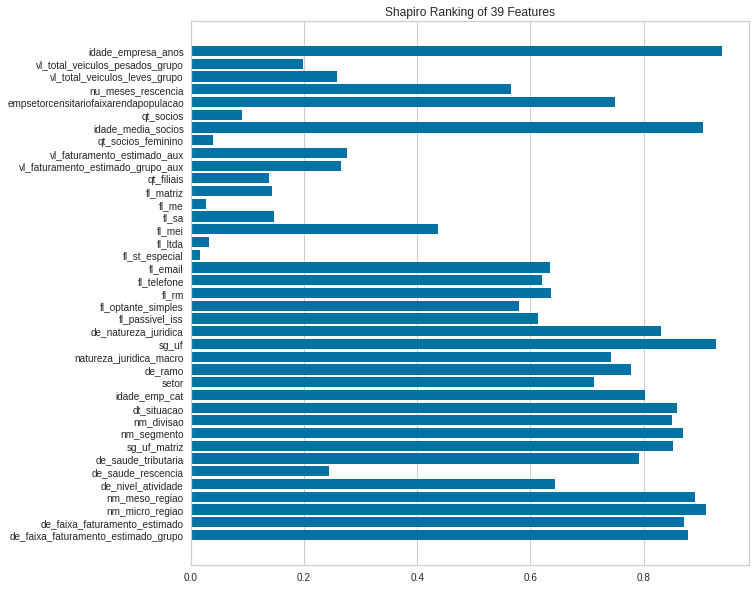

In [53]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(10,10))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

In [55]:
feature_importance.columns

Index(['id', 'idade_empresa_anos', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'empsetorcensitariofaixarendapopulacao', 'qt_socios',
       'idade_media_socios', 'qt_socios_feminino',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa', 'fl_mei', 'fl_ltda',
       'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'fl_optante_simples', 'fl_passivel_iss', 'de_natureza_juridica',
       'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_emp_cat',
       'dt_situacao', 'nm_divisao', 'nm_segmento', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'target'],
      dtype='object')

## Escolhendo as features com mais de 0.5 de importância 

In [54]:
market_clean_features = market_clean_enconded.copy()

In [56]:
market_clean_features.drop(['vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo','qt_socios','qt_socios_feminino','vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa', 'fl_mei', 'fl_ltda', 'fl_st_especial','de_saude_rescencia'],axis=1,inplace=True)

In [58]:
market_clean_features.head()

,idade_empresa_anos,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,idade_media_socios,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_passivel_iss,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
0,0.468908,-0.218332,3.206583e-14,0.128755,1,1,1,1,1,60,4,2,11,2,1,2709,32,10,19,4,0,6,48,2,2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,-0.882484,-1.741135,-8.700907e-01,-1.571173,1,1,1,1,1,17,3,5,21,4,0,6811,3,3,16,2,1,4,69,10,10,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,-0.296966,0.107983,-6.164806e-01,-1.071194,0,1,1,1,1,17,1,5,32,4,3,4783,86,20,2,0,2,2,43,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,-0.357370,0.107983,-8.630394e-01,-0.671211,1,1,1,1,1,17,1,5,25,4,3,4994,74,17,2,0,2,2,43,10,10,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,-0.701843,0.216755,1.623920e+00,0.010406,1,1,1,1,1,17,4,5,27,4,0,6183,77,8,19,4,0,6,48,10,10,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [62]:
market_clean_features.shape

(462298, 26)

In [59]:
market_clean_features.to_csv('market_clean_features.csv')

In [ ]:
market_clean_enconded.to_csv('market_clean_enconded.csv')